# Table of Contents
 <p>

In [3]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [11]:
class Pole():
    def __init__(self,board,x,y, players = [1,-1]):
        self.x = x
        self.y = y
        self.players = players
        self.board = board
        
    def fall(self, x, y, player):
        pole = self.board[x,y,:]
        if len(pole.nonzero()[0])>0:
            height = pole.nonzero()[0].max()+1
        else:
            height = 0
        self.board[x,y,height] = self.players[player]
        
class Game(Pole):
    def __init__(self,k, players = [1,-1]):
        self.k = k
        self.board = np.zeros((k,k,k))
        self.players = players
        self.currentPlayer = 0
        
    def _hackplay(self, x,y, player):
        self.fall(x,y,player)

    def play(self, x,y):
        self.fall(x,y,self.currentPlayer)
        self.currentPlayer = (self.currentPlayer+1)%2
        
    def lookUp(self):
        # Retas
        for eixo in range(3):
            eixoSum = self.board.sum(axis=eixo)
            a1, a2 = (np.abs(eixoSum) == self.k).nonzero()
            if len(a1)>0:
                if eixo==0:
                    return np.array([[i,a1[0],a2[0]] for i in range(self.k)])
                elif eixo==1:
                    return np.array([[a1[0],i,a2[0]] for i in range(self.k)])
                elif eixo==2:
                    return np.array([[a1[0],a2[0],i] for i in range(self.k)])

        for xyz in np.array([[0,0,1],[0,1,1],[0,1,0],[1,0,0],[1,0,1],[1,1,0],[1,1,1],[0,0,0]])*(self.k-1):
            for change in [[0,0,1],[0,1,1],[0,1,0],[1,0,0],[1,0,1],[1,1,0],[1,1,1]]:
                diagi = self.diag(xyz,change)
                if np.abs(self.board[diagi[:,0],diagi[:,1],diagi[:,2]].sum()) == self.k:
                    return diagi
        
    def diag(self, xyz, change=[1,1,1]):
        def idchange(index):
            if index == 0: return self.k
            elif index == self.k-1 :return 0 
            else: raise ValueError("Strange index, should be min or max")
                
        end =  [ idchange(axi) if change[i] else axi for i,axi in enumerate(xyz)]
        changer = np.array([change[i] if axi == 0 else -1*change[i] for i,axi in enumerate(xyz)])
        idxs = [np.array(xyz)]
        for i in range(self.k - 1):
            idxs.append(idxs[-1]+changer)
        return np.array(idxs)

        
import ipywidgets as wdg
from IPython.display import display
class ticTacShow(Game):
    def __init__(self,k,colors = {-1:'red',1:'blue'}):
        self.k = k
        self.board = np.zeros((k,k,k))
        self.players = [1,-1]
        self.currentPlayer = 0
        self.colors = colors
        self.markers = {-1:'*',1:'o'}
  
    def show(self):
        plt.clf()
        fig = plt.figure(figsize=(10,10));
        ax = fig.add_subplot(111, projection='3d');
        
        for i in range(self.k):
            for j in range(self.k):
                ax.plot([i,i],[j,j],[0,self.k-1],color='brown',linewidth=3,alpha=.5)
                #ax.scatter(self.board.nonzero()[0],self.board.nonzero()[1],self.board.nonzero()[2], s=1500,alpha=1)
                self.plotPoleBalls(i,j,ax)
        plt.xticks([]); plt.yticks([])
        final = g.lookUp()
        if final is not None:
            ax.plot(final[:,0],final[:,1],final[:,2],'r--',linewidth=5)
            plt.title('Player %d WON!!!'%((self.currentPlayer+1)%2),fontsize=22)
        else:
            plt.title('Player %d time to play!!'%self.currentPlayer)
        #display(plt.gcf())
        
    def plotPoleBalls(self,x,y,ax):
        for z in range(self.k):
            if self.board[x,y,z] != 0:
                ax.scatter(x,y,z, s=500+1500/self.k,alpha=1, c = self.colors[self.board[x,y,z]],marker = self.markers[self.board[x,y,z]])
    
    def interactive(self,AI = False):
        #@ipw.interact_manual(x=wdg.BoundedIntText(min=0,max=self.k),y=wdg.BoundedIntText(min=0,max=self.k))
        if AI:
            pass
        
        else:
            @wdg.interact_manual(x=wdg.Dropdown(options=range(self.k)),y=wdg.Dropdown(options=range(self.k)))
            def playAndShow(x,y):
                self.play(x,y)
                self.show()

In [12]:
g = ticTacShow(3)
g.interactive()

interactive(children=(Dropdown(description='x', options=(0, 1, 2), value=0), Dropdown(description='y', options=(0, 1, 2), value=0), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

In [454]:
g.lookUp()

array([[2, 2, 0],
       [1, 1, 0],
       [0, 0, 0]])

NameError: name 'x' is not defined

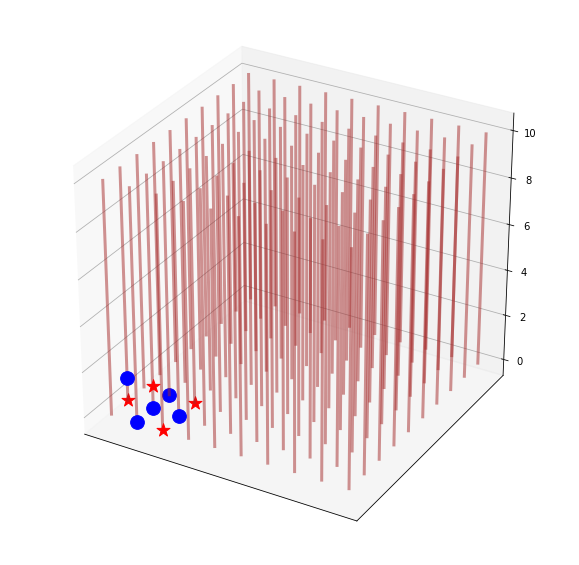

In [331]:
g = ticTacShow(10)
g.play(1,1)
g.play(1,1)
g.play(1,2)
g.play(2,0)
g.play(2,1)
g.play(2,2)
g.play(1,0)
g.play(0,1);g.play(0,1)
g.show()

SyntaxError: unexpected EOF while parsing (<ipython-input-339-76b98ab2c642>, line 1)

IntSlider(value=0, max=5)

In [310]:

g

In [195]:
display(plt.gcf())

In [196]:
plt.gcf()

In [118]:
g.play(1,1)
g.board

<class 'int'>


IndexError: index 3 is out of bounds for axis 2 with size 3

In [57]:
g = Game(3)

In [40]:
p=Pole(g.board,3,3)

(array([3]), array([5]), array([7]))

In [12]:
game[3,5,7] = 999

In [15]:
game[3,5,:].nonzero()

(array([7]),)

In [ ]:
play()

In [1]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

